# <span style="color:#DC143C">Part 1</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

lakers_purple = '#552583'
lakers_orange = '#FDB927'

# <span style="font-size:24px; color:#552583;">Data Loading</span>

In [2]:
data1 = pd.read_csv("kobe_shots.csv")
data = data1.copy()

# <span style="font-size:24px;color:#552583">Feature engineering</span>

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

# <span style="font-size:24px;color:#552583">Removing nulls</span>

In [4]:
data = data[pd.notnull(data['shot_made_flag'])]

In [5]:
#data.info()

# <span style="font-size:24px;color:#552583">Removing obvious columns</span>

In [6]:
data = data.drop(['game_event_id'], axis=1)
data = data.drop(['team_id'], axis=1)
data = data.drop(['team_name'], axis=1)
data = data.drop(['game_date'], axis=1)
data = data.drop(['game_id'], axis=1)

# <span style="font-size:24px;color:#552583">Class balance</span>

In [7]:
y = data['shot_made_flag']
scores = np.sum(y==1)
misses = np.sum(y==0)
scores, misses

(11465, 14232)

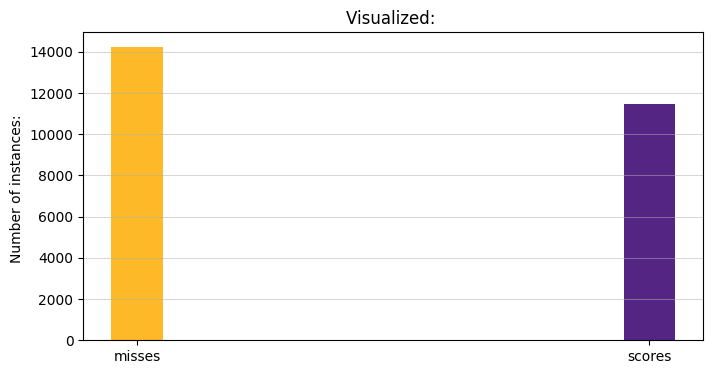

In [8]:
plt.figure(figsize = (8,4))
plt.title('Visualized: ')
plt.xticks([0,1])
plt.ylabel('Number of instances: ')
plt.bar(['misses', 'scores'], [misses, scores], width=0.1, color = [lakers_orange, lakers_purple])

plt.grid(axis = 'y', linewidth = 0.37)
#plt.tight_layout()
plt.show()

# <span style="font-size:24px;color:#552583">minutes_remaining, seconds_remaining ---> seconds_remaining</span>

In [9]:
#minutes_remaining represents the number of minutes until the end of quarter and seconds_remaining represents
#the number of seconds until the end of quarter. We can merge this into one column: remaining seconds until end of quarter.

In [10]:
data['remaining_time'] = 60*data['minutes_remaining'] + data['seconds_remaining']

In [11]:
data['remaining_time'].describe()

count    25697.000000
mean       321.519321
std        208.311076
min          0.000000
25%        141.000000
50%        304.000000
75%        499.000000
max        714.000000
Name: remaining_time, dtype: float64

In [12]:
data = data.drop(['minutes_remaining'], axis=1)
data = data.drop(['seconds_remaining'], axis=1)

# <span style="font-size:24px;color:#552583">Shot & Action & Combined shot Type</span>

In [13]:
#action_type, combined_shot_type and shot_type looks coorelated. Lets check unique values thay can take:

In [14]:
print(len(data.action_type.unique()))
print(data.action_type.unique())
print("******************************************************")
print(data.shot_type.unique())
print("******************************************************")
print(data.combined_shot_type.unique())
print("******************************************************")


55
['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback 

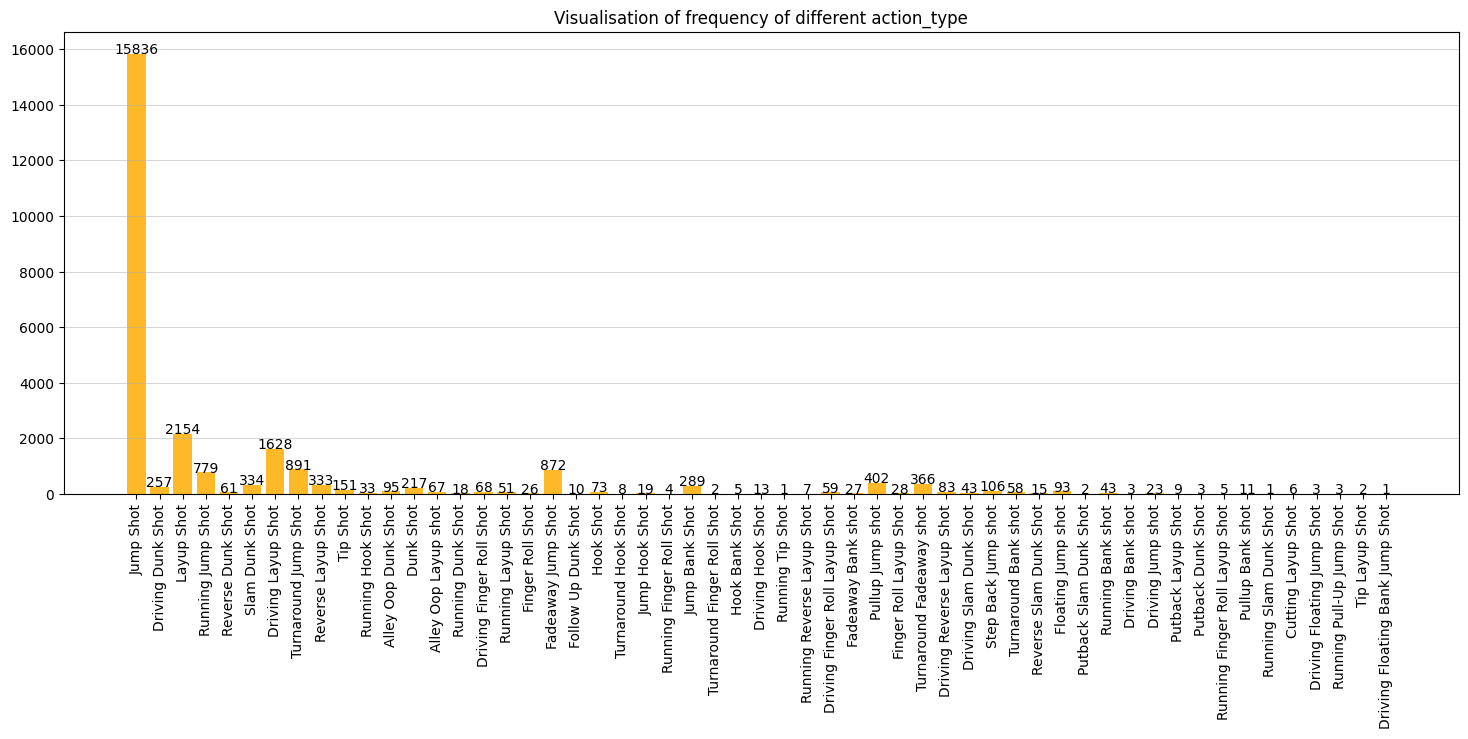

In [15]:
#Visualisation of frequency of different action_type

X = data.action_type.unique()
dict = {}
for item in X:
    dict[item] = sum(data['action_type'] == item)

values = list(dict.values())
plt.figure(figsize = (18, 6))
plt.title('Visualisation of frequency of different action_type')
plt.bar(X, list(dict.values()), color = lakers_orange)
plt.xticks(np.arange(len(X)), X, rotation = 'vertical')
plt.grid(axis = 'y', linewidth = 0.37)

for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center')

plt.show()

#TODO: sortiranje po argumentima: np.argsort

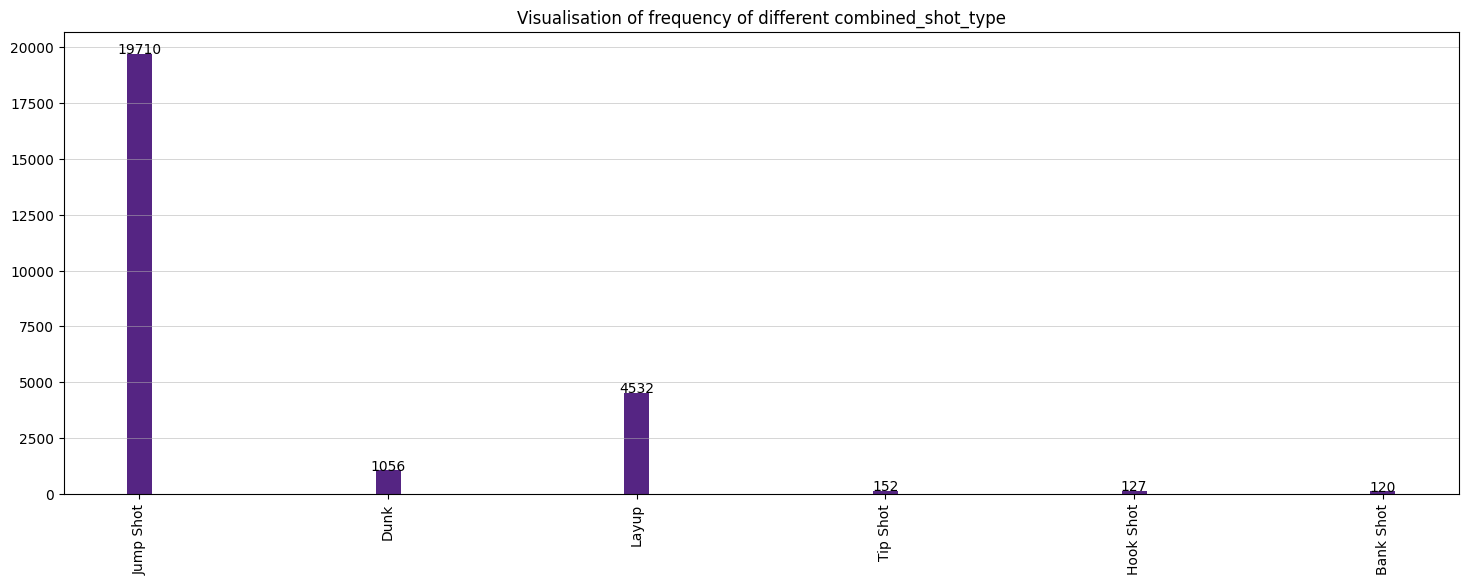

In [16]:
#Visualisation of frequency of different combined_shot_type

X = data.combined_shot_type.unique()
dict = {}
for item in X:
    dict[item] = sum(data['combined_shot_type'] == item)

values = list(dict.values())
plt.figure(figsize = (18, 6))
plt.title('Visualisation of frequency of different combined_shot_type')
plt.bar(X, list(dict.values()), color = lakers_purple, width=0.1)
plt.xticks(np.arange(len(X)), X, rotation = 'vertical')
plt.grid(axis = 'y', linewidth = 0.37)


for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center')

plt.show()

#TODO: sortiranje po argumentima: np.argsort

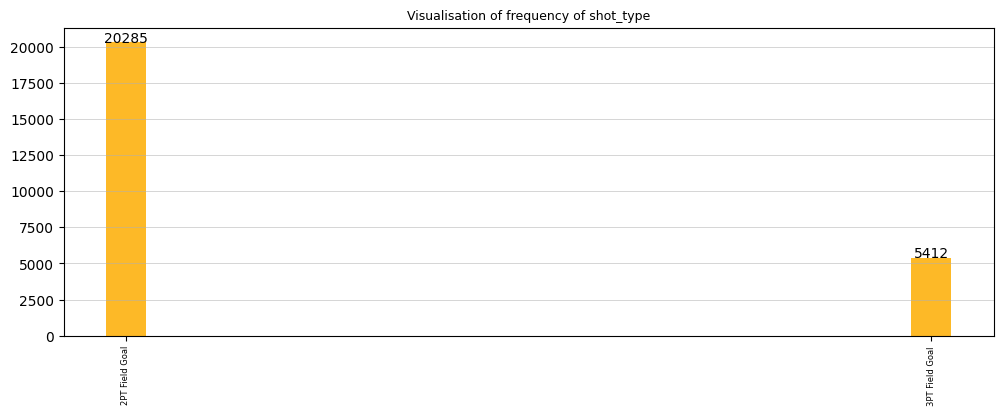

In [17]:
#Visualisation of frequency of different shot_type_type

X = data.shot_type.unique()
dict = {}
for item in X:
    dict[item] = sum(data['shot_type'] == item)

values = list(dict.values())
plt.figure(figsize = (12, 4))
plt.title('Visualisation of frequency of shot_type', fontsize = 9)
plt.bar(X, list(dict.values()), color = lakers_orange, width=0.05)
plt.xticks(np.arange(len(X)), X, rotation = 'vertical', fontsize=6)
plt.grid(axis = 'y', linewidth = 0.37)

for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center')

plt.show()

#TODO: sortiranje po argumentima: np.argsort

### Dummy variables for shot_type

In [18]:
dummies = pd.get_dummies(data['shot_type'], prefix=None)
data = pd.concat([data, dummies], axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25697 entries, 1 to 30696
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   lat                 25697 non-null  float64
 3   loc_x               25697 non-null  int64  
 4   loc_y               25697 non-null  int64  
 5   lon                 25697 non-null  float64
 6   period              25697 non-null  int64  
 7   playoffs            25697 non-null  int64  
 8   season              25697 non-null  object 
 9   shot_distance       25697 non-null  int64  
 10  shot_made_flag      25697 non-null  float64
 11  shot_type           25697 non-null  object 
 12  shot_zone_area      25697 non-null  object 
 13  shot_zone_basic     25697 non-null  object 
 14  shot_zone_range     25697 non-null  object 
 15  matchup             25697 non-null  object 
 16  opponent 

# <span style="font-size:24px;color:#552583">What is lat, loc_x, loc_y, lon?</span>

In [20]:
data[['lat', 'loc_x','loc_y', 'lon']].describe()

,lat,loc_x,loc_y,lon
count,25697.000000,25697.000000,25697.000000,25697.000000
mean,33.953043,7.148422,91.257345,-118.262652
std,0.088152,110.073147,88.152106,0.110073
min,33.253300,-250.000000,-44.000000,-118.519800
25%,33.884300,-67.000000,4.000000,-118.336800
50%,33.970300,0.000000,74.000000,-118.269800
75%,34.040300,94.000000,160.000000,-118.175800
max,34.088300,248.000000,791.000000,-118.021800


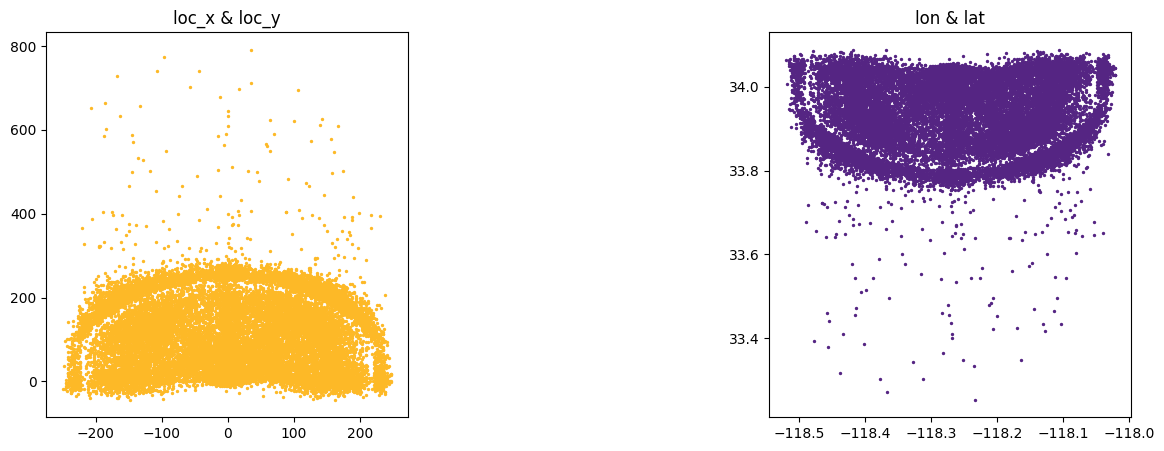

In [21]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(data.loc_x,data.loc_y, s=2, color = lakers_orange)
plt.title('loc_x & loc_y')

plt.subplot(1,2,2)
plt.scatter(data.lon,data.lat, s=2, color = lakers_purple)
plt.title('lon & lat')

plt.subplots_adjust(wspace=1)

plt.show()


In [22]:
#Looks like they are same, the only difference is a view side and metrics so we can drop (loc_x, loc_y) or (lon,lat) 

In [23]:
data = data.drop(['lon'], axis=1)
data = data.drop(['lat'], axis=1)

In [24]:
#Lets visualize this a littlebit better:

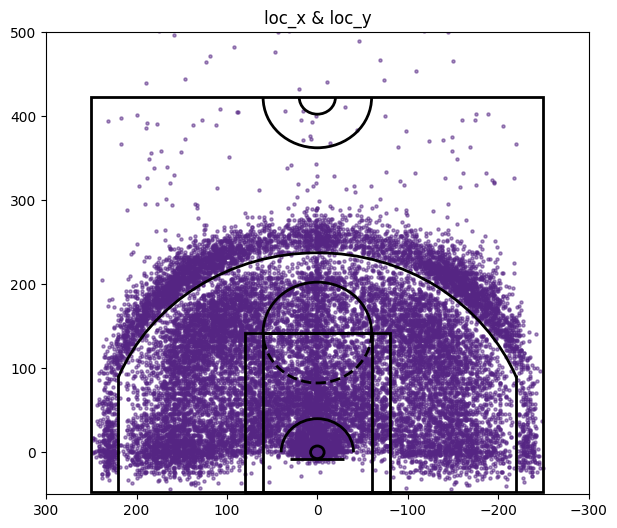

In [25]:
# time to add basketball court lines for context
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

# let's draw the court
plt.figure(figsize=(7,6))
plt.scatter(data['loc_x'],data['loc_y'], color= lakers_purple, s=5, alpha=0.5)
draw_court(outer_lines=True)

plt.title("loc_x & loc_y")
plt.ylim(-50,500)
plt.xlim(300,-300)
plt.show()

In [26]:
#Looks like Kobe prefers right over left corner

# <span style="font-size:24px;color:#552583">Shot type & zones visualisation</span>

In [27]:
print(data['shot_zone_area'].unique())
print(data['shot_zone_basic'].unique())
print(data['shot_zone_range'].unique())

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


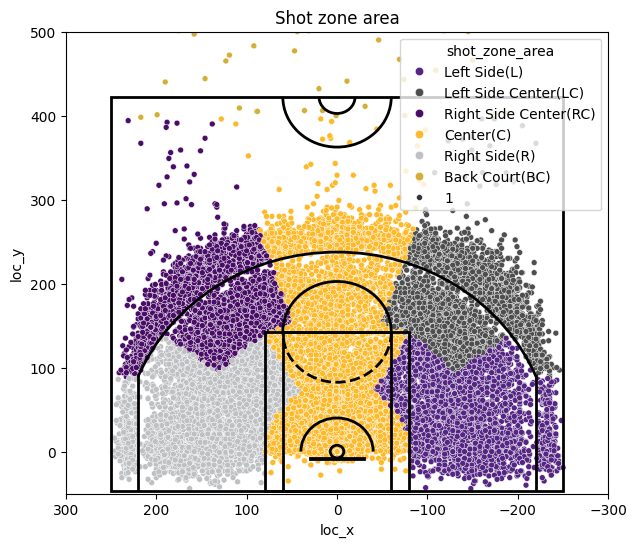

In [28]:
plt.figure(figsize=(7,6))
custom_palette = sns.color_palette([lakers_purple, '#4E4E4E','#4A0D67', lakers_orange,'#BEC0C2','#D4AF37'])
sns.scatterplot(data=data, x='loc_x', y='loc_y', hue='shot_zone_area', palette=custom_palette, size = 1)
draw_court(outer_lines=True)
tmp='#D4AF37'
# and now draw the shots
plt.ylim(-50,500)
plt.xlim(300,-300)
plt.title('Shot zone area')
plt.show()

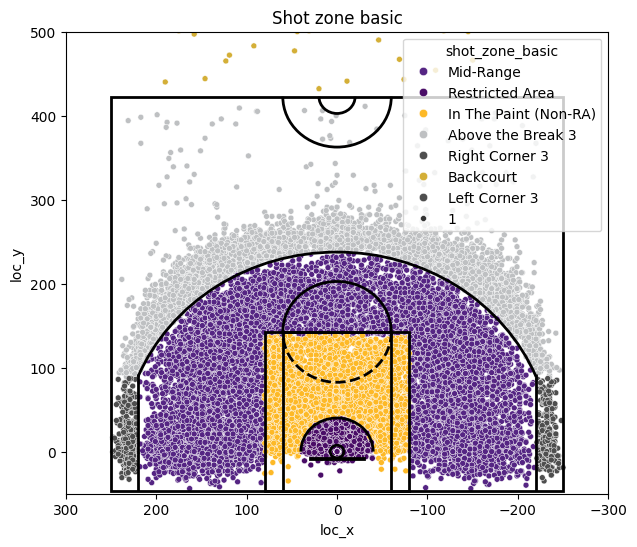

In [29]:
plt.figure(figsize=(7,6))
custom_palette2 = {
    'In The Paint (Non-RA)': lakers_orange,  
    'Mid-Range': lakers_purple,  
    'Restricted Area': '#4A0D67',# Dark-Purpple
    'Above the Break 3' : '#BEC0C2', #silver
    'Right Corner 3' : '#4E4E4E', #dark gray
    'Left Corner 3' : '#4E4E4E', #dark gray
    'Backcourt' : '#D4AF37' #metalic gold
}

sns.scatterplot(data=data, x='loc_x', y='loc_y', hue='shot_zone_basic', palette=custom_palette2, size = 1)
draw_court(outer_lines=True)

plt.ylim(-50,500)
plt.xlim(300,-300)
plt.title('Shot zone basic')
plt.show()

# <span style="font-size:24px;color:#552583">Is matchup == opponent ?</span>

In [31]:
data[['matchup', 'opponent']].head()

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR


In [32]:
opponents = list(data['opponent'].unique())
print(len(opponents))

matchups = list(data['matchup'].unique())
print(len(matchups))

#Interesantno, nije 2*isti broj... Zasto?

matchups.sort()
print(matchups)



33
74
['LAL @ ATL', 'LAL @ BKN', 'LAL @ BOS', 'LAL @ CHA', 'LAL @ CHH', 'LAL @ CHI', 'LAL @ CLE', 'LAL @ DAL', 'LAL @ DEN', 'LAL @ DET', 'LAL @ GSW', 'LAL @ HOU', 'LAL @ IND', 'LAL @ LAC', 'LAL @ MEM', 'LAL @ MIA', 'LAL @ MIL', 'LAL @ MIN', 'LAL @ NJN', 'LAL @ NOH', 'LAL @ NOK', 'LAL @ NOP', 'LAL @ NYK', 'LAL @ OKC', 'LAL @ ORL', 'LAL @ PHI', 'LAL @ PHO', 'LAL @ PHX', 'LAL @ POR', 'LAL @ SAC', 'LAL @ SAS', 'LAL @ SEA', 'LAL @ TOR', 'LAL @ UTA', 'LAL @ UTH', 'LAL @ VAN', 'LAL @ WAS', 'LAL vs. ATL', 'LAL vs. BKN', 'LAL vs. BOS', 'LAL vs. CHA', 'LAL vs. CHH', 'LAL vs. CHI', 'LAL vs. CLE', 'LAL vs. DAL', 'LAL vs. DEN', 'LAL vs. DET', 'LAL vs. GSW', 'LAL vs. HOU', 'LAL vs. IND', 'LAL vs. LAC', 'LAL vs. MEM', 'LAL vs. MIA', 'LAL vs. MIL', 'LAL vs. MIN', 'LAL vs. NJN', 'LAL vs. NOH', 'LAL vs. NOK', 'LAL vs. NOP', 'LAL vs. NYK', 'LAL vs. OKC', 'LAL vs. ORL', 'LAL vs. PHI', 'LAL vs. PHO', 'LAL vs. PHX', 'LAL vs. POR', 'LAL vs. SAC', 'LAL vs. SAN', 'LAL vs. SAS', 'LAL vs. SEA', 'LAL vs. TOR', 'L

In [33]:
count_occurrences_vs = sum(list(map(lambda x: x.count('vs'), matchups)))
count_occurrences_at = sum(list(map(lambda x: x.count('@'), matchups)))
print(count_occurrences_vs, count_occurrences_at)

l = []
for matchup in matchups:
    index = matchup.find("@ ")
    if index != -1:
        l.append(matchup[index+2:])
print(l)
print(len(l))

diff = [item for item in l if item not in opponents]
print(diff)

filtered_df = data[data['matchup'] == "LAL @ CHH"]
#print(filtered_df[['matchup', 'opponent']])


37 37
['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN', 'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'PHX', 'POR', 'SAC', 'SAS', 'SEA', 'TOR', 'UTA', 'UTH', 'VAN', 'WAS']
37
['CHH', 'NOK', 'PHO', 'UTH']


In [34]:
tmp = data[data['matchup'] == 'LAL @ CHH']
print(tmp[['matchup', 'opponent']].head(10))

        matchup opponent
1131  LAL @ CHH      CHA
1133  LAL @ CHH      CHA
1135  LAL @ CHH      CHA
1136  LAL @ CHH      CHA
1139  LAL @ CHH      CHA
1140  LAL @ CHH      CHA
1142  LAL @ CHH      CHA
1143  LAL @ CHH      CHA
1144  LAL @ CHH      CHA
1145  LAL @ CHH      CHA


In [35]:
#Internet says that CHH is unofficial name for NBA team CHA, so we can drop matchup

In [36]:
#There are two formats in matchup:
# 1) LAL @ XYZ   (played in guests)
# 2) LAL vs. XYZ (played at home)

#Changes we 'll make:
# 1) new column: "home_court" 1 if "vs", 0 if "@"
# 2) drop matchup

In [37]:
contains_vs = lambda x: int("vs" in x)
result_list = list(map(contains_vs, data["matchup"]))
#print(result_list)
data["home_court"] = result_list

In [38]:
data = data.drop(['matchup'], axis=1)

# <span style="font-size:24px;color:#552583">Shot Distance</span>

In [39]:
print(sorted(data["shot_distance"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 74, 77, 79]


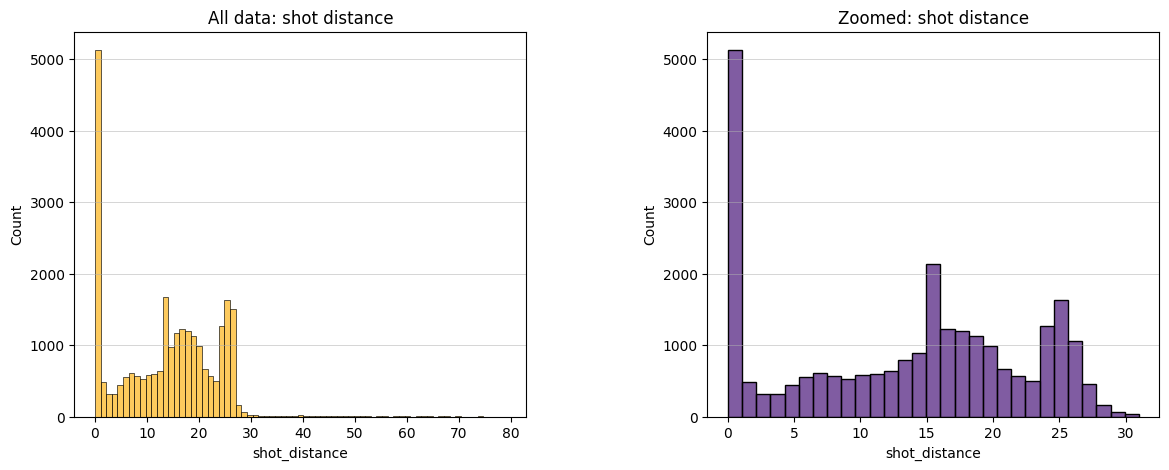

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=data, x="shot_distance", color = lakers_orange)
plt.title('All data: shot distance')
plt.grid(axis = 'y', linewidth = 0.37)

plt.subplot(1,2,2)
sns.histplot(data=data[data["shot_distance"] < 32], x="shot_distance", color = lakers_purple)
plt.title('Zoomed: shot distance')
plt.grid(axis = 'y', linewidth = 0.37)
plt.subplots_adjust(wspace=0.4)

plt.show()

In [41]:
#This corresponds to the distance in feet when shooting.

# <span style="font-size:24px;color:#552583">Season</span>

In [42]:
data['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [43]:
#Transforming data['season'] to first year in season so we can work with numbers, not strings.

In [44]:
year = lambda x: x.split("-", 1)[0]
data['season'] = list(map(year, data["season"]))
data['season'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1996', '1997', '1998', '1999'], dtype=object)

Text(0.5, 1.0, 'Count by seasons')

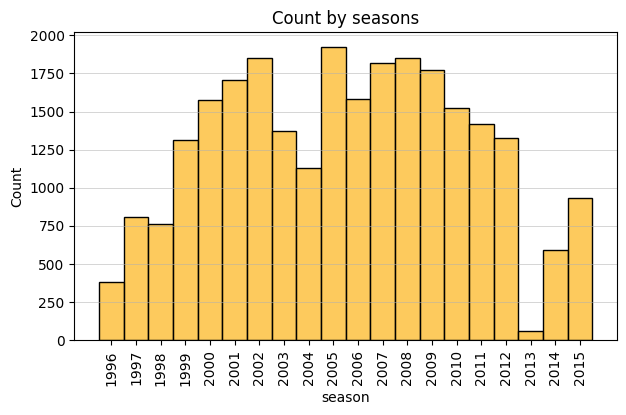

In [45]:
sorted_data = data.sort_values(by = "season")

plt.figure(figsize=(7,4))
ax = sns.histplot(data=sorted_data, x="season", color = lakers_orange)
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.grid(axis = 'y', linewidth = 0.37)
plt.title('Count by seasons')

In [46]:
#Notice that in season 2013-14 there are drasticly less shots.

# <span style="font-size:24px;color:#552583">Injury</span>

In [47]:
#On April 12, 2013, Los Angeles Lakers legend Kobe Bryant made two clutch free throws after a torn Achilles injury against the Golden State Warriors,
#literally doing whatever he could to will his team to the playoffs. :)
#We will add atribute 'injury'

In [48]:
func = lambda x: int(int(x) > int(2012))
result_list = list(map(func, data["season"]))
data['injury'] = result_list

In [49]:
#data.info()

# <span style="font-size:24px;color:#552583">Dropping columns</span>

In [50]:
data = data.drop([ 'shot_zone_range', 'shot_id', 'shot_type' ], axis=1)
#data.info()

# <span style="color:#552583">Save to .csv format</span>

In [51]:
data.to_csv('output1.csv', index=False)